# Final Project Job Connector Data Science and Machine Learning Part 2
(JCDS0804 JKT)

**By: Azizur Rachman**

### This part is where modelling to predict Attrition in HR Analysis, steps are as follow:

The model that will be used are:
- Logistic Regression
- RandomForest Classfier
- K Nearest Neighbors

1. Preprocessing Features
2. Splitting dataset without scalling
3. Using Scaled data
4. Handling Imbalance data
5. Feature Selection
6. Deploy model

In [84]:
# import warnings
# warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split


from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import joblib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Load the dataset

In [2]:
full_data_clean_gen = pd.read_csv('Dataset/full_data_clean_gen.csv')

In [3]:
pd.set_option('display.max_columns',None)
full_data_clean_gen.head()

,EmployeeID,Gender,Age,MaritalStatus,DistanceFromHome,EducationField,Education,Department,JobLevel,JobRole,StandardHours,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,MonthlyIncome,PercentSalaryHike,BusinessTravel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,PerformanceRating,StockOptionLevel,EmployeeCount,Over18,Attrition,Generation
0,1,Female,51,Married,6,Life Sciences,2,Sales,1,Healthcare Representative,8,1,1,1,131160,11,Travel_Rarely,6,0,0,3,3,4,2,3,0,1,Y,No,Generation X
1,2,Female,31,Single,10,Life Sciences,1,Research & Development,1,Research Scientist,8,5,6,0,41890,23,Travel_Frequently,3,1,4,2,3,2,4,4,1,1,Y,Yes,Millenials
2,3,Male,32,Married,17,Other,4,Research & Development,4,Sales Executive,8,5,5,1,193280,15,Travel_Frequently,2,0,3,3,2,2,1,3,3,1,Y,No,Millenials
3,4,Male,38,Married,2,Life Sciences,5,Research & Development,3,Human Resources,8,8,13,3,83210,11,Non-Travel,5,7,5,2,4,4,3,3,3,1,Y,No,Generation X
4,5,Male,32,Single,10,Medical,1,Research & Development,1,Sales Executive,8,6,9,4,23420,12,Travel_Rarely,2,0,4,3,4,1,3,3,2,1,Y,No,Millenials


In [4]:
full_data_clean_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
Age                        4410 non-null int64
MaritalStatus              4410 non-null object
DistanceFromHome           4410 non-null int64
EducationField             4410 non-null object
Education                  4410 non-null int64
Department                 4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
StandardHours              4410 non-null int64
YearsAtCompany             4410 non-null int64
TotalWorkingYears          4410 non-null int64
NumCompaniesWorked         4410 non-null int64
MonthlyIncome              4410 non-null int64
PercentSalaryHike          4410 non-null int64
BusinessTravel             4410 non-null object
TrainingTimesLastYear      4410 non-null int64
YearsSinceLastPromotion    4410 non-null 

For pre-selection of features, eliminate unneccesary features such as: 'EmployeeCount','EmployeeID','StandardHours','Over18', in addition, 'Generation'as it was used as an age group identifier

In [5]:
full_data_clean_gen = full_data_clean_gen.drop(columns = ['EmployeeCount','EmployeeID','StandardHours','Over18','Generation'])
full_data_clean_gen

,Gender,Age,MaritalStatus,DistanceFromHome,EducationField,Education,Department,JobLevel,JobRole,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,MonthlyIncome,PercentSalaryHike,BusinessTravel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,PerformanceRating,StockOptionLevel,Attrition
0,Female,51,Married,6,Life Sciences,2,Sales,1,Healthcare Representative,1,1,1,131160,11,Travel_Rarely,6,0,0,3,3,4,2,3,0,No
1,Female,31,Single,10,Life Sciences,1,Research & Development,1,Research Scientist,5,6,0,41890,23,Travel_Frequently,3,1,4,2,3,2,4,4,1,Yes
2,Male,32,Married,17,Other,4,Research & Development,4,Sales Executive,5,5,1,193280,15,Travel_Frequently,2,0,3,3,2,2,1,3,3,No
3,Male,38,Married,2,Life Sciences,5,Research & Development,3,Human Resources,8,13,3,83210,11,Non-Travel,5,7,5,2,4,4,3,3,3,No
4,Male,32,Single,10,Medical,1,Research & Development,1,Sales Executive,6,9,4,23420,12,Travel_Rarely,2,0,4,3,4,1,3,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Female,42,Single,5,Medical,4,Research & Development,1,Research Scientist,3,10,3,60290,17,Travel_Rarely,5,0,2,3,4,1,3,3,1,No
4406,Male,29,Divorced,2,Medical,4,Research & Development,1,Laboratory Technician,3,10,2,26790,15,Travel_Rarely,2,0,2,2,4,4,3,3,0,No
4407,Male,25,Married,25,Life Sciences,2,Research & Development,2,Sales Executive,4,5,0,37020,20,Travel_Rarely,4,1,2,3,1,3,3,4,0,No
4408,Male,42,Divorced,18,Medical,2,Sales,1,Laboratory Technician,9,10,0,23980,14,Travel_Rarely,2,7,8,2,4,1,3,3,1,No


In [6]:
full_data_clean_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
Gender                     4410 non-null object
Age                        4410 non-null int64
MaritalStatus              4410 non-null object
DistanceFromHome           4410 non-null int64
EducationField             4410 non-null object
Education                  4410 non-null int64
Department                 4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
YearsAtCompany             4410 non-null int64
TotalWorkingYears          4410 non-null int64
NumCompaniesWorked         4410 non-null int64
MonthlyIncome              4410 non-null int64
PercentSalaryHike          4410 non-null int64
BusinessTravel             4410 non-null object
TrainingTimesLastYear      4410 non-null int64
YearsSinceLastPromotion    4410 non-null int64
YearsWithCurrManager       4410 non-null int64
JobInvolvement             4410 non-null 

In [7]:
categorical_features = list(full_data_clean_gen.select_dtypes(include = [object]))

numerical_features = list(full_data_clean_gen.select_dtypes(exclude = [object])) 
#check again for the number of datatypes other than object

In [8]:
categorical_features

['Gender',
 'MaritalStatus',
 'EducationField',
 'Department',
 'JobRole',
 'BusinessTravel',
 'Attrition']

In [9]:
numerical_features

['Age',
 'DistanceFromHome',
 'Education',
 'JobLevel',
 'YearsAtCompany',
 'TotalWorkingYears',
 'NumCompaniesWorked',
 'MonthlyIncome',
 'PercentSalaryHike',
 'TrainingTimesLastYear',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'JobInvolvement',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'PerformanceRating',
 'StockOptionLevel']

Categorical values will have to be encoded in order for machine learning to work.
For Categorical Features, there are those values containing 2 categories and other features containing more than 2 categories.

For features containing just 2 categories, LabelEncoder is used ('Gender', 'Attrition'
For features containing more than 2 categories, OneHot Encoder is used (the original features will be dropped as well)

In [10]:
cat_feat1 = ['Attrition','Gender'] #to be encoded with LabelEncoder
cat_feat2 = ['MaritalStatus','EducationField','Department','JobRole','BusinessTravel'] 
#to be encoded using pandas dummy variable (similar to that of OneHotEncoder)

In [11]:
LabEnc = LabelEncoder()
for feat in cat_feat1:
    full_data_clean_gen[feat] = LabEnc.fit_transform(full_data_clean_gen[feat])

In [12]:
full_data_clean_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
Gender                     4410 non-null int32
Age                        4410 non-null int64
MaritalStatus              4410 non-null object
DistanceFromHome           4410 non-null int64
EducationField             4410 non-null object
Education                  4410 non-null int64
Department                 4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
YearsAtCompany             4410 non-null int64
TotalWorkingYears          4410 non-null int64
NumCompaniesWorked         4410 non-null int64
MonthlyIncome              4410 non-null int64
PercentSalaryHike          4410 non-null int64
BusinessTravel             4410 non-null object
TrainingTimesLastYear      4410 non-null int64
YearsSinceLastPromotion    4410 non-null int64
YearsWithCurrManager       4410 non-null int64
JobInvolvement             4410 non-null i

In [13]:
full_data_clean_gen= pd.get_dummies(full_data_clean_gen, prefix=cat_feat2, columns= cat_feat2)

In [14]:
full_data_clean_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 44 columns):
Gender                               4410 non-null int32
Age                                  4410 non-null int64
DistanceFromHome                     4410 non-null int64
Education                            4410 non-null int64
JobLevel                             4410 non-null int64
YearsAtCompany                       4410 non-null int64
TotalWorkingYears                    4410 non-null int64
NumCompaniesWorked                   4410 non-null int64
MonthlyIncome                        4410 non-null int64
PercentSalaryHike                    4410 non-null int64
TrainingTimesLastYear                4410 non-null int64
YearsSinceLastPromotion              4410 non-null int64
YearsWithCurrManager                 4410 non-null int64
JobInvolvement                       4410 non-null int64
EnvironmentSatisfaction              4410 non-null int64
JobSatisfaction                      4

In [15]:
full_data_clean_gen.to_csv('Dataset/full_data_ready_encode.csv', index = False) 

In this new dataframe, the new encoded categorical values have been changed and concatenated

In [16]:
full_data_ready_encode = pd.read_csv('Dataset/full_data_ready_encode.csv')

In [17]:
full_data_ready_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 44 columns):
Gender                               4410 non-null int64
Age                                  4410 non-null int64
DistanceFromHome                     4410 non-null int64
Education                            4410 non-null int64
JobLevel                             4410 non-null int64
YearsAtCompany                       4410 non-null int64
TotalWorkingYears                    4410 non-null int64
NumCompaniesWorked                   4410 non-null int64
MonthlyIncome                        4410 non-null int64
PercentSalaryHike                    4410 non-null int64
TrainingTimesLastYear                4410 non-null int64
YearsSinceLastPromotion              4410 non-null int64
YearsWithCurrManager                 4410 non-null int64
JobInvolvement                       4410 non-null int64
EnvironmentSatisfaction              4410 non-null int64
JobSatisfaction                      4

## Splitting data Train/Test 80/20 Unscaled, feature total: 44

### Note for variable allocation
1. Unscaled : x1_train, x1_test, y1_train, y1_test
2. Scaled : x_train_robust, x_test_robust, y_train_robust, y_test_robust

In [19]:
x1 = full_data_ready_encode.drop('Attrition', axis = 1)
y1 = full_data_ready_encode['Attrition']

In [21]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size = 0.20,random_state = 42)

[[739   2]
 [139   2]]


C:\Users\Azizur Rachman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


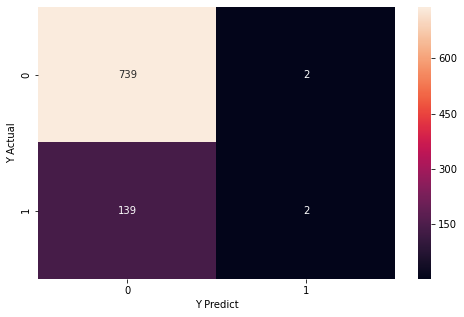

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       741
           1       0.50      0.01      0.03       141

    accuracy                           0.84       882
   macro avg       0.67      0.51      0.47       882
weighted avg       0.79      0.84      0.77       882

Train score: 83.84%
Test score: 84.01%

Logistic Regression Cross Validation Score: 83.9%



C:\Users\Azizur Rachman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Azizur Rachman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

In [42]:
log1 = LogisticRegression(solver='lbfgs',penalty='l2', max_iter=100, random_state=1)
log1.fit(x1_train, y1_train)

y1_pred = log1.predict(x1_test)

print(confusion_matrix(y1_test, y1_pred))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y1_test, y1_pred))
print(f'Train score: {round(log1.score(x1_train, y1_train)*100, 2)}%')
print(f'Test score: {round(log1.score(x1_test, y1_test)*100, 2)}%\n')

log1_score = cross_val_score(log1, x1_test, y1_test, cv=10).mean()
print(f'Logistic Regression Cross Validation Score: {round(log1_score*100, 2)}%\n')

[[741   0]
 [  6 135]]


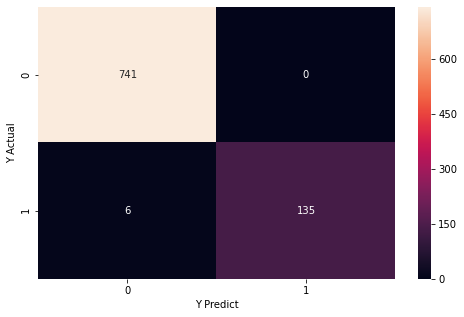

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882

Train score: 100.0%
Test score: 99.32%

RandomForest Cross Validation Score: 88.89%



In [40]:
rfc1 = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                              n_estimators=100,random_state=1)
rfc1.fit(x1_train, y1_train)

y1_pred = rfc1.predict(x1_test)

print(confusion_matrix(y1_test, y1_pred))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y1_test, y1_pred))
print(f'Train score: {round(rfc1.score(x1_train, y1_train)*100, 2)}%')
print(f'Test score: {round(rfc1.score(x1_test, y1_test)*100, 2)}%\n')

rfc1_score = cross_val_score(rfc1, x1_test, y1_test, cv=10).mean()
print(f'RandomForest Cross Validation Score: {round(rfc1_score*100, 2)}%\n')

[[673  68]
 [100  41]]


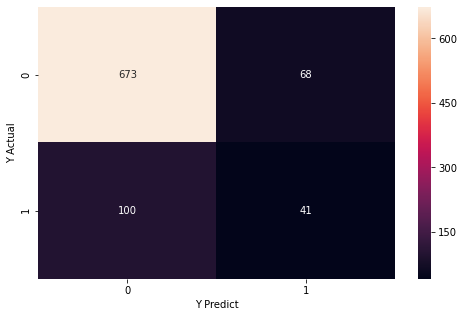

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       741
           1       0.38      0.29      0.33       141

    accuracy                           0.81       882
   macro avg       0.62      0.60      0.61       882
weighted avg       0.79      0.81      0.80       882

Train score: 93.28%
Test score: 80.95%

K Nearest Neighbours Validation Score: 81.52%



In [59]:
knn1 = KNeighborsClassifier(n_neighbors=5,
                                  algorithm='auto')
knn1.fit(x1_train, y1_train)

y1_pred = knn1.predict(x1_test)

print(confusion_matrix(y1_test, y1_pred))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()


print(classification_report(y1_test, y1_pred))
print(f'Train score: {round(knn1.score(x1_train, y1_train)*100, 2)}%')
print(f'Test score: {round(knn1.score(x1_test, y1_test)*100, 2)}%\n')

knn1_score = cross_val_score(knn1, x1_test, y1_test, cv=10).mean()
print(f'K Nearest Neighbours Validation Score: {round(knn1_score*100, 2)}%\n')

## Robust Scaler

In [50]:
num_feats = ['Age','DistanceFromHome','Education','JobLevel','YearsAtCompany',
             'TotalWorkingYears','NumCompaniesWorked','MonthlyIncome','PercentSalaryHike','TrainingTimesLastYear',
             'YearsSinceLastPromotion','YearsWithCurrManager','JobInvolvement','EnvironmentSatisfaction','JobSatisfaction',
             'WorkLifeBalance','PerformanceRating','StockOptionLevel'] 

In [52]:
robust = RobustScaler()
full_data_ready_robust= pd.DataFrame(robust.fit_transform(full_data_ready_encode[num_feats]), columns=num_feats)
full_data_ready_robust = pd.concat([full_data_ready_robust, full_data_ready_encode.drop(columns=num_feats)], axis=1)
full_data_ready_robust.head()

,Age,DistanceFromHome,Education,JobLevel,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,MonthlyIncome,PercentSalaryHike,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,PerformanceRating,StockOptionLevel,Gender,Attrition,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,1.153846,-0.083333,-0.5,-0.5,-0.666667,-1.000000,-0.333333,1.498811,-0.500000,3.0,-0.333333,-0.6,0.0,0.0,0.5,-1.0,0.0,-1.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,-0.384615,0.250000,-1.0,-0.5,0.000000,-0.444444,-0.666667,-0.133480,1.500000,0.0,0.000000,0.2,-1.0,0.0,-0.5,1.0,1.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,-0.307692,0.833333,0.5,1.0,0.000000,-0.555556,-0.333333,2.634668,0.166667,-1.0,-0.333333,0.0,0.0,-0.5,-0.5,-2.0,0.0,2.0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.153846,-0.416667,1.0,0.5,0.500000,0.333333,0.333333,0.622052,-0.500000,2.0,2.000000,0.4,-1.0,0.5,0.5,0.0,0.0,2.0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,-0.307692,0.250000,-1.0,-0.5,0.166667,-0.111111,0.666667,-0.471201,-0.333333,-1.0,-0.333333,0.2,0.0,0.5,-1.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [53]:
full_data_ready_robust.to_csv('Dataset/full_data_ready_robust.csv', index = False) 
#export to csv just in case we want to use it later

## Splitting data Train/Test 80/20 Robust Scaled

In [89]:
x_robust = full_data_ready_robust.drop('Attrition', axis = 1)
y_robust = full_data_ready_robust['Attrition']

In [90]:
x_train_robust, x_test_robust, y_train_robust, y_test_robust = train_test_split(x_robust,y_robust,
                                                                                test_size = 0.20,
                                                                                random_state = 42 )
# x_train_robust
# x_test_robust
# y_train_robust
# y_test_robust

[[718  23]
 [116  25]]


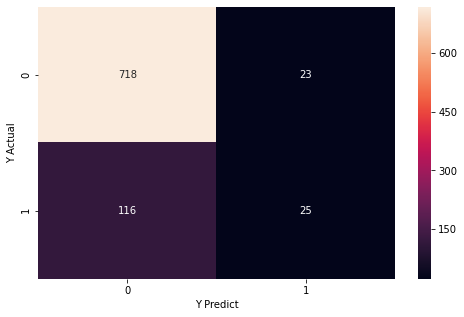

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       741
           1       0.52      0.18      0.26       141

    accuracy                           0.84       882
   macro avg       0.69      0.57      0.59       882
weighted avg       0.81      0.84      0.81       882

Train score: 85.46%
Test score: 84.24%

Logistic Regression Cross Validation Score: 83.34%



In [91]:
log_robust = LogisticRegression(solver='lbfgs',penalty='l2', max_iter=100, random_state=1)
log_robust.fit(x_train_robust, y_train_robust)

y_pred_robust = log_robust.predict(x_test_robust)

print(confusion_matrix(y_test_robust, y_pred_robust))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_robust, y_pred_robust), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y_test_robust, y_pred_robust))
print(f'Train score: {round(log_robust.score(x_train_robust, y_train_robust)*100, 2)}%')
print(f'Test score: {round(log_robust.score(x_test_robust, y_test_robust)*100, 2)}%\n')

log_robust_score = cross_val_score(log_robust, x_test_robust, y_test_robust, cv=10).mean()
print(f'Logistic Regression Cross Validation Score: {round(log_robust_score*100, 2)}%\n')

[[741   0]
 [  6 135]]


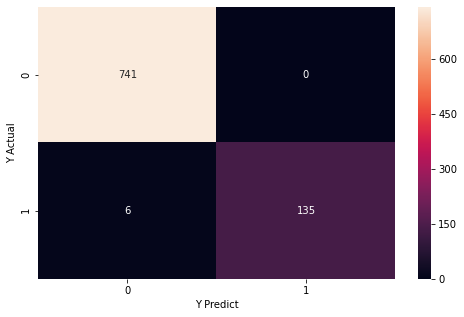

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882

Train score: 100.0%
Test score: 99.32%

Random Forest Classifier Cross Validation Score: 89.34%



In [94]:
rfc_robust = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                              n_estimators=100,random_state=1)
rfc_robust.fit(x_train_robust, y_train_robust)

y_pred_robust = rfc_robust.predict(x_test_robust)

print(confusion_matrix(y_test_robust, y_pred_robust))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_robust, y_pred_robust), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y_test_robust, y_pred_robust))
print(f'Train score: {round(rfc_robust.score(x_train_robust, y_train_robust)*100, 2)}%')
print(f'Test score: {round(rfc_robust.score(x_test_robust, y_test_robust)*100, 2)}%\n')

rfc_robust_score = cross_val_score(rfc_robust, x_test_robust, y_test_robust, cv=10).mean()
print(f'Random Forest Classifier Cross Validation Score: {round(rfc_robust_score*100, 2)}%\n')

The Above result is potentially selected since recall 1 (recall attrition) and precision 0 are almost 1

[[687  54]
 [ 96  45]]


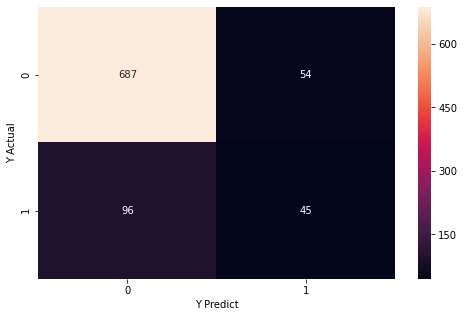

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       741
           1       0.45      0.32      0.38       141

    accuracy                           0.83       882
   macro avg       0.67      0.62      0.64       882
weighted avg       0.81      0.83      0.82       882

Train score: 94.1%
Test score: 82.99%

K- Nearest Neighbours Cross Validation Score: 83.34%



In [95]:
knn_robust = KNeighborsClassifier(n_neighbors=5,
                                  algorithm='auto')
knn_robust.fit(x_train_robust, y_train_robust)

y_pred_robust = knn_robust.predict(x_test_robust)

print(confusion_matrix(y_test_robust, y_pred_robust))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_robust, y_pred_robust), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y_test_robust, y_pred_robust))
print(f'Train score: {round(knn_robust.score(x_train_robust, y_train_robust)*100, 2)}%')
print(f'Test score: {round(knn_robust.score(x_test_robust, y_test_robust)*100, 2)}%\n')

knn_robust_score = cross_val_score(knn_robust, x_test_robust, y_test_robust, cv=10).mean()
print(f'K- Nearest Neighbours Cross Validation Score: {round(knn_robust_score*100, 2)}%\n')

## Handling Imbalance data target (Attrition)

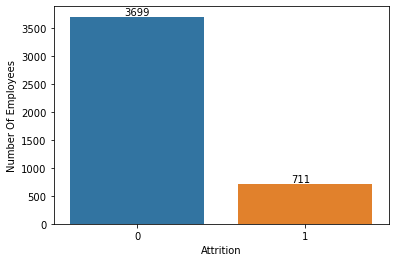

In [96]:
figsize=(100,100)
ax = sns.countplot(full_data_clean_gen['Attrition']) # from the dataset after label encoded to 1 and 0
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.32 , p.get_height()+25))
plt.ylabel('Number Of Employees')
plt.show()

## Using SMOTE after Robust Scaler

In [97]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train_robust == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_robust == 0))) 
  
sm = SMOTE(random_state = 5) 
x_train_robust_sm, y_train_robust_sm = sm.fit_sample(x_train_robust, y_train_robust) #transform to SM (SMOTE)
 
  
print('After OverSampling, the shape of x_train_robust_sm: {}'.format(x_train_robust_sm.shape)) 
print('After OverSampling, the shape of y_train_robust_sm: {} \n'.format(y_train_robust_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_robust_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_robust_sm == 0)))


Before OverSampling, counts of label '1': 570
Before OverSampling, counts of label '0': 2958 

After OverSampling, the shape of x_train_robust_sm: (5916, 43)
After OverSampling, the shape of y_train_robust_sm: (5916,) 

After OverSampling, counts of label '1': 2958
After OverSampling, counts of label '0': 2958


### Note: 
When using SMOTE, x_train and y_train are the only one transformed to x_train_sm an y_train respectively.  When testing, untransformed x_test and y_test are used

[[635 106]
 [ 77  64]]


C:\Users\Azizur Rachman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


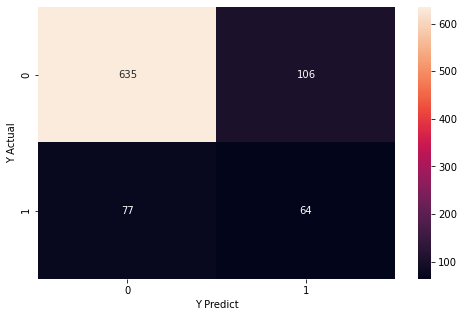

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       741
           1       0.38      0.45      0.41       141

    accuracy                           0.79       882
   macro avg       0.63      0.66      0.64       882
weighted avg       0.81      0.79      0.80       882

Train score: 82.57%
Test score: 79.25%

Logistic Regression Cross Validation Score: 83.34%



In [99]:
log_robust_sm = LogisticRegression(solver='lbfgs',penalty='l2', max_iter=100, random_state=1)
log_robust_sm.fit(x_train_robust_sm, y_train_robust_sm)

y_pred_robust_sm = log_robust_sm.predict(x_test_robust) #use x_test_robust (no SMOTE)

print(confusion_matrix(y_test_robust, y_pred_robust_sm))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_robust, y_pred_robust_sm), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y_test_robust, y_pred_robust_sm))
print(f'Train score: {round(log_robust_sm.score(x_train_robust_sm, y_train_robust_sm)*100, 2)}%')
print(f'Test score: {round(log_robust_sm.score(x_test_robust, y_test_robust)*100, 2)}%\n')

log_robust_sm_score = cross_val_score(log_robust_sm, x_test_robust, y_test_robust, cv=10).mean()
print(f'Logistic Regression Cross Validation Score: {round(log_robust_sm_score*100, 2)}%\n')

There is an increase in recall 1 and precision 0 value after SMOTE-Robust treatment

[[738   3]
 [  6 135]]


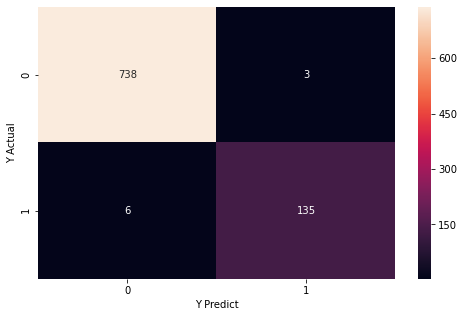

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       741
           1       0.98      0.96      0.97       141

    accuracy                           0.99       882
   macro avg       0.99      0.98      0.98       882
weighted avg       0.99      0.99      0.99       882

Train score: 100.0%
Test score: 98.98%

Random Forest Clasifier Cross Validation Score: 89.34%



In [100]:
rfc_robust_sm = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                              n_estimators=100,random_state=1)
rfc_robust_sm.fit(x_train_robust_sm, y_train_robust_sm)

y_pred_robust_sm = rfc_robust_sm.predict(x_test_robust)

print(confusion_matrix(y_test_robust, y_pred_robust_sm))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_robust, y_pred_robust_sm), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y_test_robust, y_pred_robust_sm))
print(f'Train score: {round(rfc_robust_sm.score(x_train_robust_sm, y_train_robust_sm)*100, 2)}%')
print(f'Test score: {round(rfc_robust_sm.score(x_test_robust, y_test_robust)*100, 2)}%\n')

rfc_robust_sm_score = cross_val_score(rfc_robust_sm, x_test_robust, y_test_robust, cv=10).mean()
print(f'Random Forest Clasifier Cross Validation Score: {round(rfc_robust_sm_score*100, 2)}%\n')

An increase in score also found here using random forest classifier (recall 1 and precision 0)

[[538 203]
 [  8 133]]


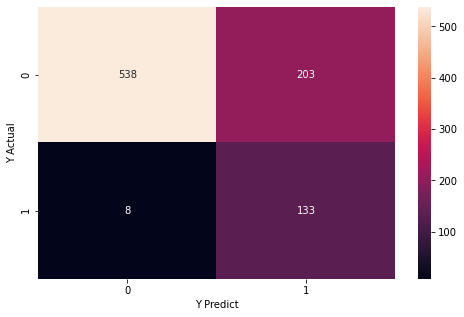

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       741
           1       0.40      0.94      0.56       141

    accuracy                           0.76       882
   macro avg       0.69      0.83      0.70       882
weighted avg       0.89      0.76      0.79       882

Train score: 95.2%
Test score: 76.08%

K Nearest Neighbours Clasifier Cross Validation Score: 83.34%



In [103]:
knn_robust_sm = KNeighborsClassifier(n_neighbors=5,
                                  algorithm='auto')
knn_robust_sm.fit(x_train_robust_sm, y_train_robust_sm)

y_pred_robust_sm = knn_robust_sm.predict(x_test_robust)

print(confusion_matrix(y_test_robust, y_pred_robust_sm))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_robust, y_pred_robust_sm), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y_test_robust, y_pred_robust_sm))
print(f'Train score: {round(knn_robust_sm.score(x_train_robust_sm, y_train_robust_sm)*100, 2)}%')
print(f'Test score: {round(knn_robust_sm.score(x_test_robust, y_test_robust)*100, 2)}%\n')

knn_robust_sm_score = cross_val_score(knn_robust_sm, x_test_robust, y_test_robust, cv=10).mean()
print(f'K Nearest Neighbours Clasifier Cross Validation Score: {round(knn_robust_sm_score*100, 2)}%\n')


## Class Weight = 'Balanced'

[[516 225]
 [ 56  85]]


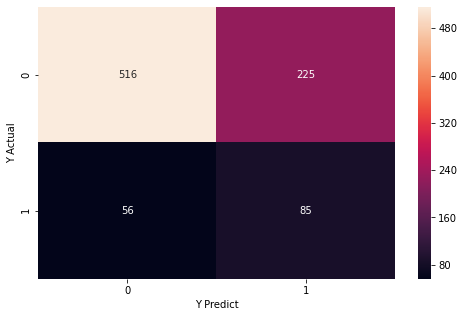

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       741
           1       0.27      0.60      0.38       141

    accuracy                           0.68       882
   macro avg       0.59      0.65      0.58       882
weighted avg       0.80      0.68      0.72       882

Train score: 71.37%
Test score: 68.14%

Logistic Regression Cross Validation Score: 68.93%



In [107]:
log_robust_balanced = LogisticRegression(solver='lbfgs',penalty='l2', max_iter=100,class_weight='balanced', random_state=1)
log_robust_balanced.fit(x_train_robust, y_train_robust)

y_pred_robust_balanced = log_robust_balanced.predict(x_test_robust)

print(confusion_matrix(y_test_robust, y_pred_robust_balanced))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_robust, y_pred_robust_balanced), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y_test_robust, y_pred_robust_balanced))
print(f'Train score: {round(log_robust_balanced.score(x_train_robust, y_train_robust)*100, 2)}%')
print(f'Test score: {round(log_robust_balanced.score(x_test_robust, y_test_robust)*100, 2)}%\n')

log_robust_balanced_score = cross_val_score(log_robust_balanced, x_test_robust, y_test_robust, cv=10).mean()
print(f'Logistic Regression Cross Validation Score: {round(log_robust_balanced_score*100, 2)}%\n')

[[741   0]
 [  6 135]]


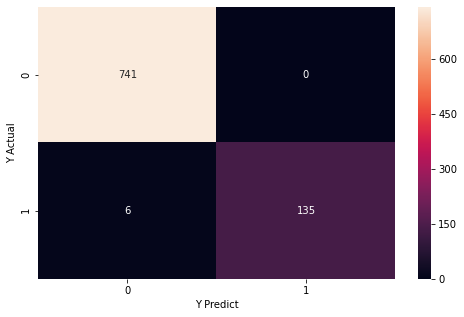

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882

Train score: 100.0%
Test score: 99.32%

Random Forest Classifier Cross Validation Score: 89.0%



In [108]:
rfc_robust_balanced = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2,class_weight= 'balanced', min_samples_leaf=1,
                              n_estimators=100,random_state=1)
rfc_robust_balanced.fit(x_train_robust, y_train_robust)

y_pred_robust_balanced = rfc_robust_balanced.predict(x_test_robust)

print(confusion_matrix(y_test_robust, y_pred_robust_balanced))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_robust, y_pred_robust_balanced), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y_test_robust, y_pred_robust_balanced))
print(f'Train score: {round(rfc_robust_balanced.score(x_train_robust, y_train_robust)*100, 2)}%')
print(f'Test score: {round(rfc_robust_balanced.score(x_test_robust, y_test_robust)*100, 2)}%\n')

rfc_robust_balanced_score = cross_val_score(rfc_robust_balanced, x_test_robust, y_test_robust, cv=10).mean()
print(f'Random Forest Classifier Cross Validation Score: {round(rfc_robust_balanced_score*100, 2)}%\n')

## Note on KNN (need to study)

[[741   0]
 [  6 135]]


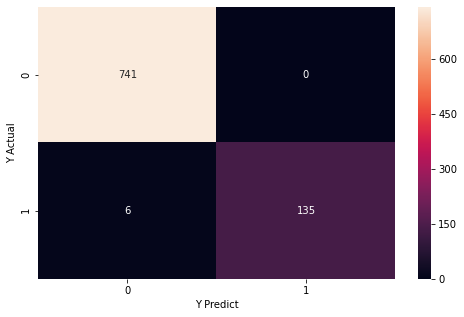

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882

Train score: 100.0%
Test score: 99.32%

K Nearest Neighbours Cross Validation Score: 87.3%

K Nearest Neighbours Cross Validation Score Train: 98.47%



In [112]:
knn_robust_balanced = KNeighborsClassifier(n_neighbors=5,weights='distance',
                                  algorithm='auto')
knn_robust_balanced.fit(x_train_robust, y_train_robust)

y_pred_robust_balanced = knn_robust_balanced.predict(x_test_robust)

print(confusion_matrix(y_test_robust, y_pred_robust_balanced))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_robust, y_pred_robust_balanced), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y_test_robust, y_pred_robust_balanced))
print(f'Train score: {round(knn_robust_balanced.score(x_train_robust, y_train_robust)*100, 2)}%')
print(f'Test score: {round(knn_robust_balanced.score(x_test_robust, y_test_robust)*100, 2)}%\n')

knn_robust_balanced_score = cross_val_score(knn_robust_balanced, x_test_robust, y_test_robust, cv=10).mean()
print(f'K Nearest Neighbours Cross Validation Score: {round(knn_robust_balanced_score*100, 2)}%\n')

knn_robust_balanced_score2 = cross_val_score(knn_robust_balanced, x_train_robust, y_train_robust, cv=10).mean()
print(f'K Nearest Neighbours Cross Validation Score Train: {round(knn_robust_balanced_score2*100, 2)}%\n')

## Selected Model
Random Forest Classifier Model with Robust scaler shown the best of them all when it comes to Recall 1 and Precision 0

[[741   0]
 [  6 135]]


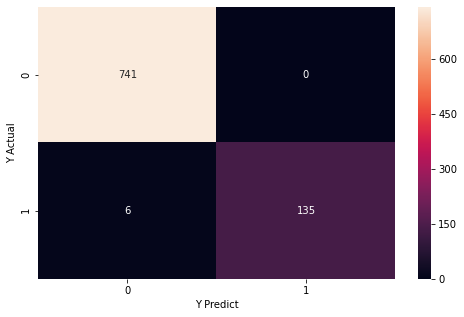

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882

Train score: 100.0%
Test score: 99.32%

Random Forest Classifier Robust Cross Validation Score: 89.34%



In [128]:
rfc_robust = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                              n_estimators=100,random_state=1)
rfc_robust.fit(x_train_robust, y_train_robust)

y_pred_robust = rfc_robust.predict(x_test_robust)

print(confusion_matrix(y_test_robust, y_pred_robust))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_robust, y_pred_robust), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y_test_robust, y_pred_robust))

rfc_robust_train_score = round(rfc_robust.score(x_train_robust, y_train_robust)*100, 2)
rfc_robust_test_score = round(rfc_robust.score(x_test_robust, y_test_robust)*100, 2)

print(f'Train score: {rfc_robust_train_score}%')
print(f'Test score: {rfc_robust_test_score }%\n')

rfc_robust_score = cross_val_score(rfc_robust, x_test_robust, y_test_robust, cv=10).mean()
print(f'Random Forest Classifier Robust Cross Validation Score: {round(rfc_robust_score*100, 2)}%\n')

## Hyper Parameter Tuning with Random Search

In [115]:
rfc_parameter_random = {'criterion' : ['gini', 'entropy'],
                 'max_depth' : [None, 10, 20, 40, 80, 100, 200, 400],
                 'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
                 'n_estimators' : [10, 20, 40, 80, 100, 200, 400, 1000]
                 }



In [116]:
%%time
rfc_random = RandomizedSearchCV(estimator=RandomForestClassifier(),
                             param_distributions = rfc_parameter_random,
                             cv=5,
                             n_iter=100, #change to 100 (default 10)
                             n_jobs=-1
                            )

rfc_random.fit(x_train_robust, y_train_robust)

Wall time: 2min 16s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

### from stack overflow:
"This parameter is used to specify how many concurrent processes or threads should be used for routines that are parallelized with joblib.

n_jobs is an integer, specifying the maximum number of concurrently running workers. If 1 is given, no joblib parallelism is used at all, which is useful for debugging. If set to -1, all CPUs are used. For n_jobs below -1, (n_cpus + 1 + n_jobs) are used. For example with n_jobs=-2, all CPUs but one are used.

n_jobs is None by default, which means unset; it will generally be interpreted as n_jobs=1, unless the current joblib.Parallel backend context specifies otherwise."

In [119]:
rfc_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None,
 'criterion': 'entropy'}

[[741   0]
 [  6 135]]


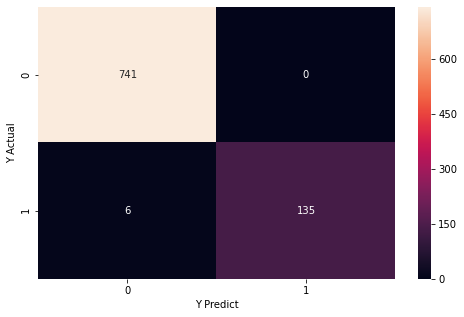

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882

Train Score: 100.0%
Test Score: 99.32%

Random Forest Classifier Robust Hyper Cross Validation Score: 89.23%



In [127]:
rfc_robust_hyper = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                              n_estimators=200,random_state=1)
rfc_robust_hyper.fit(x_train_robust, y_train_robust)

y_pred_robust_hyper = rfc_robust_hyper.predict(x_test_robust)

print(confusion_matrix(y_test_robust, y_pred_robust_hyper))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_robust, y_pred_robust_hyper), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y_test_robust, y_pred_robust_hyper))
rfc_robust_hyper_train_score = round(rfc_robust_hyper.score(x_train_robust, y_train_robust)*100, 2)
rfc_robust_hyper_test_score = round(rfc_robust_hyper.score(x_test_robust, y_test_robust)*100,2)

print(f'Train Score: {rfc_robust_hyper_train_score}%')
print(f'Test Score: {rfc_robust_hyper_test_score}%\n')
# print(f'Train score: {round(rfc_robust_hyper.score(x_train_robust, y_train_robust)*100, 2)}%')
# print(f'Test score: {round(rfc_robust_hyper.score(x_test_robust, y_test_robust)*100, 2)}%\n')

rfc_robust_hyper_score = cross_val_score(rfc_robust_hyper, x_test_robust, y_test_robust, cv=10).mean()
print(f'Random Forest Classifier Robust Hyper Cross Validation Score: {round(rfc_robust_hyper_score*100, 2)}%\n')

After Execution Hyperparameter on the above model, there seemed to be no increase in the score. 

In [129]:
compare_rfc = pd.DataFrame({'Random Forest Model' : ['Default', 'Hyperparameter'], 
                            'CrossVal Score': [rfc_robust_score, rfc_robust_hyper_score],
                           'Train Score': [rfc_robust_train_score, rfc_robust_hyper_train_score ],
                           'Test Score': [rfc_robust_test_score, rfc_robust_hyper_test_score]})

compare_rfc.head()

,Random Forest Model,CrossVal Score,Train Score,Test Score
0,Default,0.893437,100.0,99.32
1,Hyperparameter,0.892301,100.0,99.32
